<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [2]:
#importing basic libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [6]:
#Loading information csv  
info_df = pd.read_csv("asset_information_data.csv")
info_df

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [7]:
#loading price csv  
price_df = pd.read_csv("asset_price_data.csv")
price_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [8]:
#Filling all the null values with mean 
mean1 = price_df['Asset1'].mean()
mean2 = price_df['Asset2'].mean()
mean3 = price_df['Asset3'].mean()
mean4 = price_df['Asset4'].mean()
mean5 = price_df['Asset5'].mean()

price_df['Asset1'] = price_df['Asset1'].fillna(mean1) 
price_df['Asset2'] = price_df['Asset2'].fillna(mean2) 
price_df['Asset3'] = price_df['Asset3'].fillna(mean3) 
price_df['Asset4'] = price_df['Asset4'].fillna(mean4) 
price_df['Asset5'] = price_df['Asset5'].fillna(mean5) 

In [9]:
#calculating returns and adding the columns
today_prices_a1 = price_df['Asset1'].iloc[1:].values
yesterday_prices_a1 = price_df['Asset1'].iloc[:-1].values
returns1 = ((today_prices_a1/yesterday_prices_a1)-1)
price_df.loc[1:,'Daily_Return_Asset1'] = returns1

today_prices_a2 = price_df['Asset2'].iloc[1:].values
yesterday_prices_a2 = price_df['Asset2'].iloc[:-1].values
returns2 = ((today_prices_a2/yesterday_prices_a2)-1)
price_df.loc[1:,'Daily_Return_Asset2'] = returns2

today_prices_a3 = price_df['Asset3'].iloc[1:].values
yesterday_prices_a3 = price_df['Asset3'].iloc[:-1].values
returns3 = ((today_prices_a3/yesterday_prices_a3)-1)
price_df.loc[1:,'Daily_Return_Asset3'] = returns3

today_prices_a4 = price_df['Asset4'].iloc[1:].values
yesterday_prices_a4 = price_df['Asset4'].iloc[:-1].values
returns4 = ((today_prices_a4/yesterday_prices_a4)-1)
price_df.loc[1:,'Daily_Return_Asset4'] = returns4

today_prices_a5 = price_df['Asset5'].iloc[1:].values
yesterday_prices_a5 = price_df['Asset5'].iloc[:-1].values
returns5 = ((today_prices_a5/yesterday_prices_a5)-1)
price_df.loc[1:,'Daily_Return_Asset5'] = returns5

return_cols = ['Daily_Return_Asset1','Daily_Return_Asset2', 'Daily_Return_Asset3', 'Daily_Return_Asset4','Daily_Return_Asset5']
price_df[return_cols] = price_df[return_cols].fillna(0)
price_df.head(3)

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Daily_Return_Asset1,Daily_Return_Asset2,Daily_Return_Asset3,Daily_Return_Asset4,Daily_Return_Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.002740,0.020954,0.025255,-0.001125,0.019242


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [10]:
#Correlation Matrix 
correlation_matrix = price_df[['Daily_Return_Asset1','Daily_Return_Asset2', 'Daily_Return_Asset3', 'Daily_Return_Asset4', 'Daily_Return_Asset5']].corr()
correlation_matrix

,Daily_Return_Asset1,Daily_Return_Asset2,Daily_Return_Asset3,Daily_Return_Asset4,Daily_Return_Asset5
Daily_Return_Asset1,1.000000,0.524814,0.166311,0.270301,0.070765
Daily_Return_Asset2,0.524814,1.000000,0.770053,0.471650,0.575659
Daily_Return_Asset3,0.166311,0.770053,1.000000,0.425158,0.614333
Daily_Return_Asset4,0.270301,0.471650,0.425158,1.000000,0.339439
Daily_Return_Asset5,0.070765,0.575659,0.614333,0.339439,1.000000


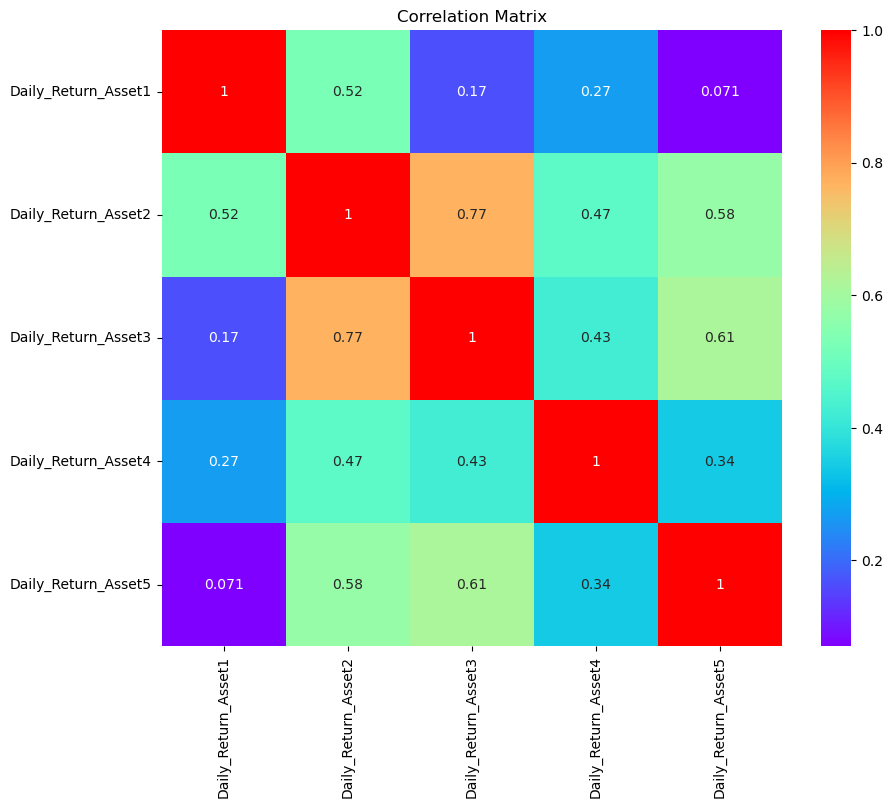

In [11]:
#Correlation Matrix for easier visualisation 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='rainbow') 
plt.title('Correlation Matrix')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

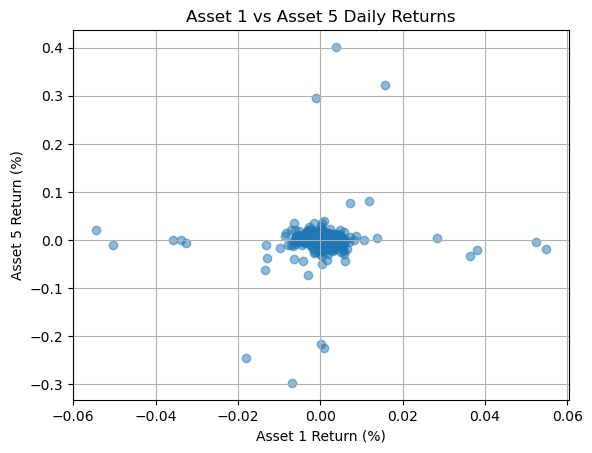

In [12]:
#Scatter Plot between the Returns of Two Assets, to assess the diversification (cross shaped indicates that they are not correlated
#they are not going to be a loss or gain together = diversification 
plt.scatter(price_df['Daily_Return_Asset1'], price_df['Daily_Return_Asset5'], alpha=0.5)

plt.title('Asset 1 vs Asset 5 Daily Returns')
plt.xlabel('Asset 1 Return (%)')
plt.ylabel('Asset 5 Return (%)')
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [108]:
#Loading the assett weight CSV 
weight_df = pd.read_csv('portfolio_weights.csv')
weight_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

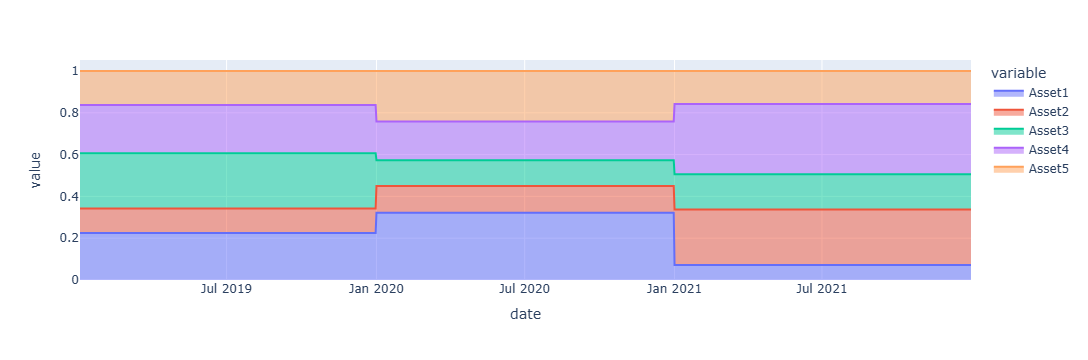

In [37]:
#Ratio of Asset1 increased in 2020 and dramatically dropped in 2021 
import plotly.express as px
fig = px.area(weight_df, x="date", y=["Asset1","Asset2", "Asset3", "Asset4", "Asset5"])
fig.show()


<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

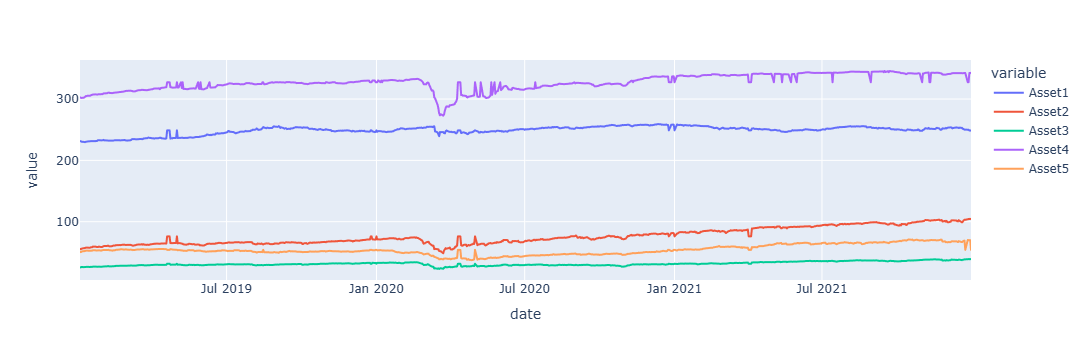

In [83]:
#visualising the cumulative returns over the given 2 years 
fig = px.line(price_df, x='date',
              y=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'])
fig.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [136]:
#Annualised Return is the average return of given period (geometric) 
returns = ['Daily_Return_Asset1', 'Daily_Return_Asset2','Daily_Return_Asset3','Daily_Return_Asset4','Daily_Return_Asset5']
avg = price_df[returns].mean()
annual_return = (1+avg) ** 261-1 #annualised return formula 
ar_df = pd.DataFrame (annual_return, columns=['Annualized_Return'])
ar_df.sort_values(by='Annualized_Return', ascending=False)

,Annualized_Return
Daily_Return_Asset2,0.328534
Daily_Return_Asset3,0.192611
Daily_Return_Asset5,0.143951
Daily_Return_Asset4,0.062451
Daily_Return_Asset1,0.028469


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [139]:
#The volatility rate is calculated over a year to be standardised 
#market open days defined as 261
returns = ['Daily_Return_Asset1', 'Daily_Return_Asset2','Daily_Return_Asset3','Daily_Return_Asset4','Daily_Return_Asset5']
std = price_df[returns].std()
vol = std * np.sqrt(261) #volatility calculation formula 
vol_df = pd.DataFrame (vol, columns=['Annualized_Volatility'])
vol_df.sort_values(by='Annualized_Volatility', ascending=False)

,Annualized_Volatility
Daily_Return_Asset5,0.482195
Daily_Return_Asset2,0.393704
Daily_Return_Asset3,0.269444
Daily_Return_Asset4,0.198271
Daily_Return_Asset1,0.090797


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

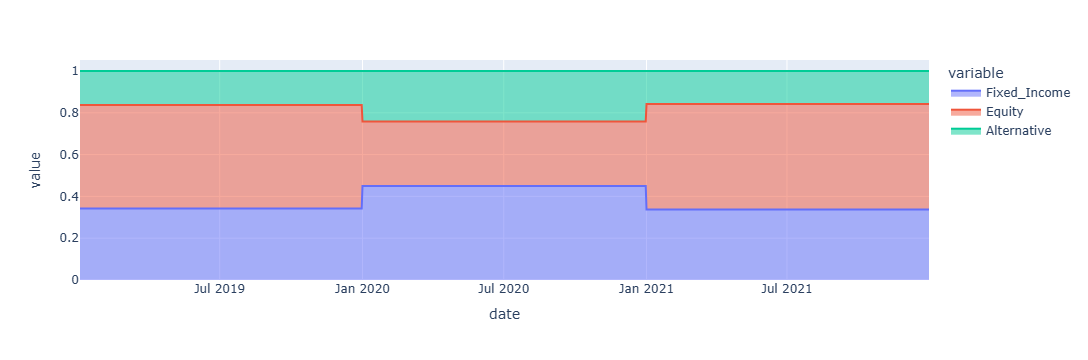

In [109]:
#combining the asset types 
weight_df['Fixed_Income'] = weight_df['Asset1'] + weight_df['Asset2']
weight_df['Equity'] = weight_df['Asset3'] + weight_df['Asset4']
weight_df['Alternative'] = weight_df['Asset5']

family_df = weight_df.groupby("date")[['Fixed_Income', 'Equity', 'Alternative']].mean().reset_index()

fig = px.area(family_df, x="date", y=["Fixed_Income","Equity", "Alternative"])
fig.show()